# __Pipeline 3, Pt 2__
## _Min Max --> Normalization --> 3 STD_

## Importing Data:

In [147]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [148]:
compdata_original = pd.read_csv('comp1data.csv', header=0, na_values = '-')
compdata_original.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


# Descriptive Statistics

In [149]:
compdata_original.shape
# 682 rows and 22 columns

(682, 22)

In [150]:
compdata_original.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


In [151]:
compdata_original.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

In [152]:
compdata_original.median()

P(IPO)     1.350000e+01
P(H)       1.500000e+01
P(L)       1.300000e+01
P(1Day)    1.484500e+01
C1         1.070000e+02
C2         1.000000e+00
C3         1.000000e-02
C4         9.124591e-03
C5         2.740018e+07
C6         7.398704e+06
C7         1.038330e+02
T1         4.440000e+02
T2         1.204500e+04
T3         1.078500e+04
T4         2.790000e+02
T5         6.240000e+02
S1         6.000000e+01
S2         1.000000e+02
S3         1.340000e+02
dtype: float64

In [153]:
# Create a copy of the data
compdata = compdata_original.copy()

# Variable Calculations:

In [154]:
# Impute the rows T2 values!!!! mean
# Cannot do calculations with missing data on the number of words, the ratios will be 0 and create outliers

compdata.loc[compdata['T2'] == 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0


In [155]:
compdata.loc[125,'T2']=compdata['T2'].mean()

In [156]:
compdata.loc[199,'T2']=compdata['T2'].mean()

In [157]:
# check for negatives
# cannot have a negative number of long words (T5)

compdata.loc[compdata['T5'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.55,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0


In [158]:
compdata.loc[7,'T5']=compdata['T5'].mean()

In [159]:
# cannot have a negative number of positive words (S1)
compdata.loc[compdata['S1'] < 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
134,COGT,"Cogent, inc.",7373,12.0,12.0,10.0,17.98,133.0,1.0,0.14,...,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,-1.0,97.0,134.0


In [160]:
# Fill the 0, negative, and infinite values with the mean for continuous values
compdata.loc[134,'S1']=compdata['S1'].mean()

In [161]:
compdata["S1"] = pd.to_numeric(compdata["S1"])

In [162]:
# Ratios:

    # ** How to find the ratio for T1 and T2... impute them

# Percentage of real words
compdata['T3_'] = (compdata['T3']/compdata['T2'])
# Percentage of long sentences
compdata['T4_'] = (compdata['T4']/compdata['T1'])
# Percentage of long words
compdata['T5_'] = (compdata['T5']/compdata['T2'])
# Percentage of positive words
compdata['S1_'] = (compdata['S1']/compdata['T2'])
# Percentage of negative words
compdata['S2_'] = (compdata['S2']/compdata['T2'])
# Percentage of uncertain words
compdata['S3_'] = (compdata['S3']/compdata['T2'])
compdata.head()

# Target & Control Variable Calculation

compdata['P(mid)'] = ((compdata['P(H)']+compdata['P(L)'])/2)

def p(row):
    if row['P(IPO)'] < row['P(mid)']:
        val = 1
    else:
        val = 0
    return val

def q(row):
    if row['P(1Day)'] > row['P(IPO)']:
        val = 1
    else:
        val = 0
    return val

def r(row):
    if row['C3'] >= 0:
        val = 1
    else:
        val = 0
    return val

def s(row):
    if row['P(IPO)'] > row['P(mid)']:
        val = (row['P(IPO)'] - row['P(mid)'])/row['P(mid)']*100
    else:
        val = 0
    return val

compdata['C3_'] = compdata.apply(r, axis=1)
compdata['C5_'] = compdata['C5']/compdata['C6'] 
compdata['C6_'] = compdata.apply(s, axis=1)
compdata['Y1'] = compdata.apply(p, axis=1)
compdata['Y2'] = compdata.apply(q, axis=1)

# Missing Data:

In [163]:
compdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 34 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
T3_        681 non-null float64
T4_        681 non-null float64
T5_        681 non-null float64
S1_        681 non-null float64
S2_        681 non-null float64
S3_        681 non-null float64
P(

In [164]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [165]:
# what is the percentage of missing data in each column
compdata.isna().mean().round(4) * 100

# Majority of the data is missing from C7

I1          0.00
I2          0.00
I3          1.17
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
T3_         0.15
T4_         0.15
T5_         0.15
S1_         0.15
S2_         0.15
S3_         0.15
P(mid)      1.47
C3_         0.00
C5_         0.88
C6_         0.00
Y1          0.00
Y2          0.00
dtype: float64

In [166]:
compdata[compdata["I1"]=='DLB']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,1.0,0.47,...,0.059655,0.004513,0.00798,0.010793,17.0,1,3.540441,5.882353,0,1


In [167]:
compdata[compdata["I1"]=='DTSI']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.92,76.0,0.0,0.99,...,0.050882,0.005922,0.011482,0.00846,15.0,1,3.410759,13.333333,0,1


In [168]:
compdata[compdata["I1"]=='RLD']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.51,98.0,1.0,-0.33,...,0.056527,0.006539,0.00874,0.014273,14.0,0,3.81107,14.285714,0,1


In [169]:
compdata[compdata["I1"]=='UPG']

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5_,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.35,101.0,0.0,0.38,...,0.04157,0.0042,0.008835,0.00956,8.0,1,1.666667,0.0,1,1


In [170]:
compdata.I3.replace(to_replace ="6794, 3861, 3663, 7819", value ="3000", inplace=True)

In [171]:
compdata.I3.replace(to_replace ="3651, 6794, 7819", value ="9900", inplace=True)

In [172]:
compdata.I3.replace(to_replace ="3663, 3861, 6794", value ="3000", inplace=True)

In [173]:
compdata.I3.replace(to_replace ="7389, 5063", value ="9900", inplace=True)

In [174]:
compdata.I3.replace(to_replace ="541990", value ="7000", inplace=True)

In [175]:
compdata["I3"] = pd.to_numeric(compdata["I3"])

In [176]:
compdata.isna().sum()

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
T3_         1
T4_         1
T5_         1
S1_         1
S2_         1
S3_         1
P(mid)     10
C3_         0
C5_         6
C6_         0
Y1          0
Y2          0
dtype: int64

In [177]:
# Since C2 is a binary value, we will fill the missing data with the mode

compdata['Imputed_C2'] = compdata['C2'].fillna(compdata['C2'].mode()[0])
compdata.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1_,S2_,S3_,P(mid),C3_,C5_,C6_,Y1,Y2,Imputed_C2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.010929,9.0,1,3.864345,11.111111,0,1,1.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.010876,9.0,0,12.028832,0.000000,1,0,0.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,0.011403,13.0,0,3.369134,0.000000,1,0,1.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,0.013319,15.0,0,3.299697,0.000000,1,1,1.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.011261,20.0,1,3.726269,5.000000,0,1,1.0


In [178]:
compdata['Imputed_C7'] = compdata['C7'].fillna(compdata['C7'].mean())

In [179]:
compdata.isna().sum()

I1             0
I2             0
I3             8
P(IPO)         5
P(H)          10
P(L)          10
P(1Day)       22
C1            22
C2            22
C3            36
C4            22
C5             6
C6             6
C7            72
T1             1
T2             1
T3             1
T4             1
T5             1
S1             1
S2             1
S3             1
T3_            1
T4_            1
T5_            1
S1_            1
S2_            1
S3_            1
P(mid)        10
C3_            0
C5_            6
C6_            0
Y1             0
Y2             0
Imputed_C2     0
Imputed_C7     0
dtype: int64

In [180]:
# Drop missing P Values from Continues DF

compdata = compdata.dropna(subset=['P(1Day)'], axis=0, how='any')

In [181]:
compdata.reset_index(drop=True, inplace=True)

In [182]:
# Create DF with only continuous features

# Drop the imputed variable colmuns
# Drop the P values
# Drop Y1 Y2 **make seperate df
    # Drop T1 and T2?

compdata_cont = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I1','I2','I3','T3','T1','T2','T4','T5','C3_','S1','S2','S3','C2','C3','C5','C6','C7','Imputed_C2','Y1','Y2'], axis=1)
compdata_cont.head()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
0,122.0,0.029074,0.908876,0.640426,0.054250,0.004875,0.009199,0.010929,3.864345,11.111111,51.345
1,259.0,-0.013352,0.898724,0.644753,0.051395,0.003258,0.011105,0.010876,12.028832,0.000000,25.936
2,90.0,0.020715,0.909350,0.636816,0.061764,0.011593,0.006271,0.011403,3.369134,0.000000,7.378
3,209.0,0.020023,0.917060,0.539634,0.061630,0.009686,0.007144,0.013319,3.299697,0.000000,8.526
4,80.0,-0.034895,0.888469,0.587413,0.048550,0.004518,0.010047,0.011261,3.726269,5.000000,632.298


In [183]:
compdata_cont.isna().sum()

C1            0
C4            0
T3_           0
T4_           0
T5_           0
S1_           0
S2_           0
S3_           0
C5_           0
C6_           0
Imputed_C7    0
dtype: int64

In [184]:
compdata_cont.shape

(660, 11)

In [185]:
# Create DF with only categorical features
# drop y1 y2 c2 i3
compdata_cat = compdata.drop(['P(IPO)','P(H)','I1','I2','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Y1','Y2','Imputed_C7'], axis=1)
compdata_cat.head()

,C3_,Imputed_C2
0,1,1.0
1,0,0.0
2,0,1.0
3,0,1.0
4,1,1.0


In [186]:
compdata_cat.shape

(660, 2)

In [187]:
targetvals = compdata.drop(['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','I3','C2','C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','I1','I2','C3_','Imputed_C2','Imputed_C7'], axis=1)
targetvals.head()

,Y1,Y2
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


In [188]:
compdata_cont.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.007282,0.891532,0.626720,0.052264,0.005318,0.009056,0.011516,4.417255,5.404645,506.358456
std,152.817467,0.033318,0.071892,0.077686,0.007075,0.001743,0.002991,0.002843,5.133537,10.877569,1583.637898
min,10.000000,-0.162352,0.000000,0.000000,0.031595,0.001602,0.002152,0.005326,0.283223,0.000000,0.074000
25%,85.000000,-0.013927,0.883417,0.580329,0.047562,0.004134,0.006966,0.009579,2.850622,0.000000,41.458000
50%,107.000000,0.009125,0.897294,0.628861,0.051943,0.005041,0.008577,0.011301,3.731035,0.000000,133.102000
75%,155.250000,0.031571,0.909693,0.674461,0.056544,0.006256,0.010521,0.012848,4.857904,7.692308,500.459962
max,2087.000000,0.092896,1.498982,0.826347,0.088960,0.012839,0.024605,0.029397,99.787255,100.000000,30683.000000


#### Run evaluation code now.. go back and check the results to see if it improved or not

##### after impute, after min max, after normalization

# Pipeline 2

## Min Max:

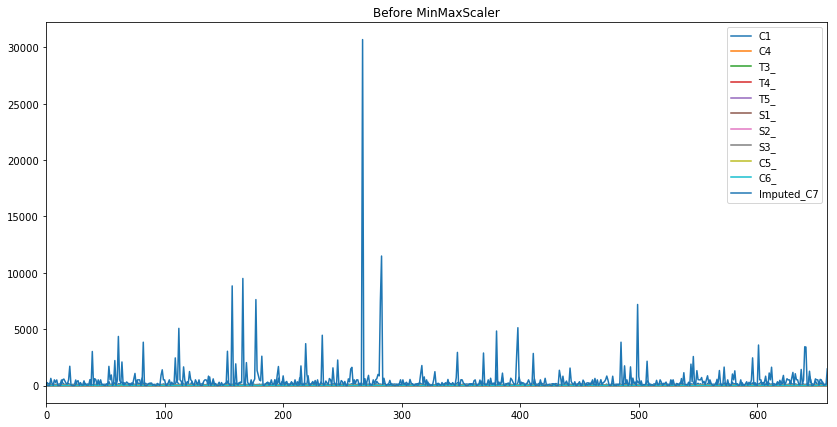

In [189]:
compdata_cont.plot(figsize=(14,7))
plt.title('Before MinMaxScaler')
plt.show()

In [190]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
compdata_cont = scaler.fit_transform(compdata_cont)
compdata_cont_transform = pd.DataFrame(compdata_cont)

In [191]:
compdata_cont_transform.columns=['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7']

In [192]:
compdata_cont_transform.describe()

,C1,C4,T3_,T4_,T5_,S1_,S2_,S3_,C5_,C6_,Imputed_C7
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.067274,0.664586,0.594759,0.758422,0.360309,0.330698,0.307467,0.257155,0.041546,0.054046,0.016501
std,0.073576,0.130531,0.047961,0.094011,0.123335,0.155132,0.133222,0.118107,0.051591,0.108776,0.051613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036110,0.581494,0.589345,0.702283,0.278330,0.225315,0.214373,0.176694,0.025802,0.000000,0.001349
50%,0.046702,0.671804,0.598602,0.761013,0.354702,0.306006,0.286152,0.248209,0.034650,0.000000,0.004336
75%,0.069933,0.759743,0.606874,0.816195,0.434922,0.414180,0.372716,0.312499,0.045975,0.076923,0.016308
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


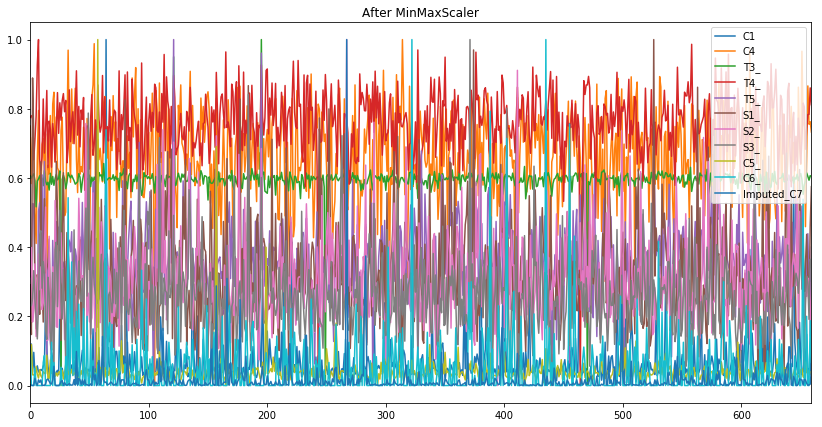

In [193]:
compdata_cont_transform.plot(figsize=(14,7))
plt.title('After MinMaxScaler')
plt.show()

# Normalization:

## Skewness 

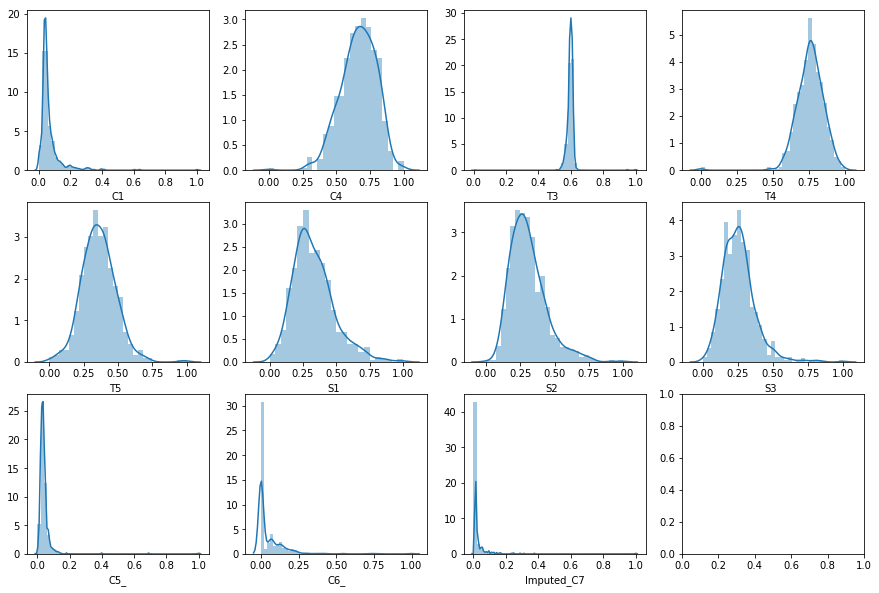

In [194]:
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont_transform["C1"] , ax=axes[0, 0])
sns.distplot( compdata_cont_transform["C4"] , ax=axes[0, 1])
sns.distplot( compdata_cont_transform["T3_"] , ax=axes[0, 2])
sns.distplot( compdata_cont_transform["T4_"] , ax=axes[0, 3])
sns.distplot( compdata_cont_transform["T5_"] , ax=axes[1, 0])
sns.distplot( compdata_cont_transform["S1_"] , ax=axes[1, 1])
sns.distplot( compdata_cont_transform["S2_"] , ax=axes[1, 2])
sns.distplot( compdata_cont_transform["S3_"] , ax=axes[1, 3])
sns.distplot( compdata_cont_transform["C5_"] , ax=axes[2, 0])
sns.distplot( compdata_cont_transform["C6_"] , ax=axes[2, 1])
sns.distplot( compdata_cont_transform["Imputed_C7"] , ax=axes[2, 2])
plt.show()

In [195]:
compdata_cont_transform.skew()

# check if its left or right skewed
# close to 0 is normal.. [-.5 - .5]
# Positive Skew: --> log
# Negative Skew: --> exponential

C1             5.649485
C4            -0.477892
T3_           -7.196921
T4_           -1.595377
T5_            0.433959
S1_            0.933902
S2_            1.193276
S3_            1.387724
C5_           13.405536
C6_            4.372685
Imputed_C7    12.193190
dtype: float64

In [196]:
# df = pd.compdata_cont(['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7'])

In [197]:
compdata_cont_transform['C1_skew'] =  stats.yeojohnson(compdata_cont_transform['C1'])[0]

In [198]:
compdata_cont_transform['C4_skew'] =  stats.yeojohnson(compdata_cont_transform['C4'])[0]

In [199]:
compdata_cont_transform['T3_skew'] =  stats.yeojohnson(compdata_cont_transform['T3_'])[0]

In [200]:
compdata_cont_transform['T4_skew']= stats.yeojohnson(compdata_cont_transform['T4_'])[0]

In [201]:
compdata_cont_transform['T5_skew']= stats.yeojohnson(compdata_cont_transform['T5_'])[0]

In [202]:
compdata_cont_transform['S1_skew']= stats.yeojohnson(compdata_cont_transform['S1_'])[0]

In [203]:
compdata_cont_transform['S2_skew']= stats.yeojohnson(compdata_cont_transform['S2_'])[0]

In [204]:
compdata_cont_transform['S3_skew']= stats.yeojohnson(compdata_cont_transform['S3_'])[0]

In [205]:
compdata_cont_transform['C5_skew'] = stats.yeojohnson(compdata_cont_transform['C5_'])[0]

In [206]:
compdata_cont_transform['C6_skew'] =  stats.yeojohnson(compdata_cont_transform['C6_'])[0]

In [207]:
compdata_cont_transform['Imputed_C7_skew']= stats.yeojohnson(compdata_cont_transform['Imputed_C7'])[0]

# 0 outputs 1 column and does not add the lambda

In [208]:
compdata_cont_transform.skew()

C1                  5.649485
C4                 -0.477892
T3_                -7.196921
T4_                -1.595377
T5_                 0.433959
S1_                 0.933902
S2_                 1.193276
S3_                 1.387724
C5_                13.405536
C6_                 4.372685
Imputed_C7         12.193190
C1_skew             0.225556
C4_skew            -0.012819
T3_skew             3.174435
T4_skew             0.111000
T5_skew            -0.000538
S1_skew             0.002129
S2_skew             0.006659
S3_skew            -0.032130
C5_skew             0.137879
C6_skew             0.719470
Imputed_C7_skew     0.941541
dtype: float64

In [209]:
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'] = compdata_cont_transform['C6_skew'].apply(np.cbrt)
compdata_cont_transform['C6_skew'].skew()

0.4810631369918453

In [210]:
compdata_cont_transform['Imputed_C7_skew'] = compdata_cont_transform['Imputed_C7_skew'].apply(np.sqrt)
compdata_cont_transform['Imputed_C7_skew'].skew()

0.2491744816741818

In [211]:
compdata_cont_transform.skew()

C1                  5.649485
C4                 -0.477892
T3_                -7.196921
T4_                -1.595377
T5_                 0.433959
S1_                 0.933902
S2_                 1.193276
S3_                 1.387724
C5_                13.405536
C6_                 4.372685
Imputed_C7         12.193190
C1_skew             0.225556
C4_skew            -0.012819
T3_skew             3.174435
T4_skew             0.111000
T5_skew            -0.000538
S1_skew             0.002129
S2_skew             0.006659
S3_skew            -0.032130
C5_skew             0.137879
C6_skew             0.481063
Imputed_C7_skew     0.249174
dtype: float64

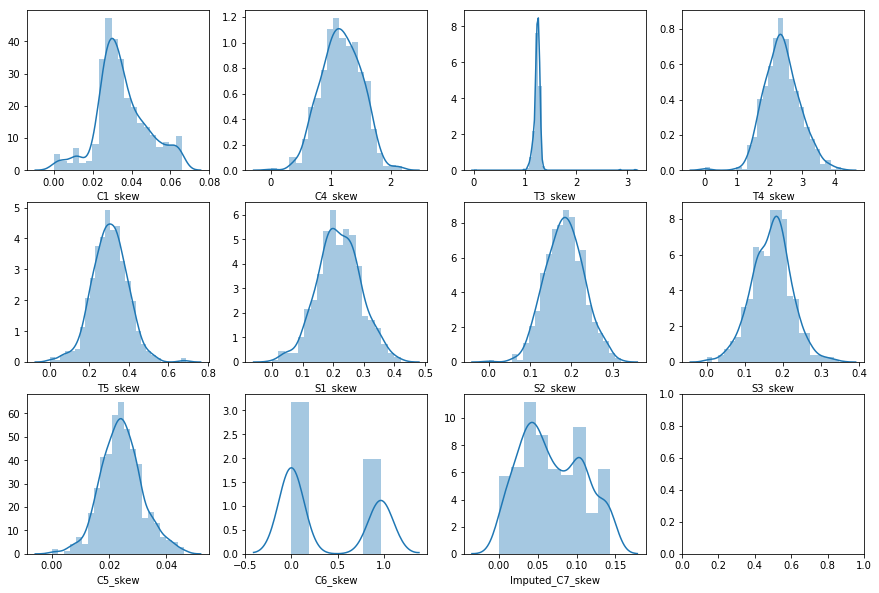

In [212]:
f, axes = plt.subplots(3, 4, figsize=(15,10), sharex=False)
sns.distplot( compdata_cont_transform["C1_skew"] , ax=axes[0, 0])
sns.distplot( compdata_cont_transform["C4_skew"] , ax=axes[0, 1])
sns.distplot( compdata_cont_transform["T3_skew"] , ax=axes[0, 2])
sns.distplot( compdata_cont_transform["T4_skew"] , ax=axes[0, 3])
sns.distplot( compdata_cont_transform["T5_skew"] , ax=axes[1, 0])
sns.distplot( compdata_cont_transform["S1_skew"] , ax=axes[1, 1])
sns.distplot( compdata_cont_transform["S2_skew"] , ax=axes[1, 2])
sns.distplot( compdata_cont_transform["S3_skew"] , ax=axes[1, 3])
sns.distplot( compdata_cont_transform["C5_skew"] , ax=axes[2, 0])
sns.distplot( compdata_cont_transform["C6_skew"] , ax=axes[2, 1])
sns.distplot( compdata_cont_transform["Imputed_C7_skew"] , ax=axes[2, 2])
plt.show()

## 3 STD:

In [213]:
for col in compdata_cont_transform.columns:
    u_bound = compdata_cont_transform[col].mean() + 3* compdata_cont_transform[col].std()
    compdata_cont_transform[col][compdata_cont_transform[col] > u_bound] = u_bound

In [214]:
for col in compdata_cont_transform.columns:
    l_bound = compdata_cont_transform[col].mean() - 3* compdata_cont_transform[col].std()
    compdata_cont_transform[col][compdata_cont_transform[col] < l_bound] = l_bound

## Binning:

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-0999 | Agriculture, Forestry and Fishing |
| 1000-1499 | Mining |
| 1800-1999 | not used |
| 2000-3999 | Manufacturing |
| 4000-4999 | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199 | Wholesale Trade |
| 5200-5999 | Retail Trade |
| 6000-6799 | Finance, Insurance and Real Estate |
| 7000-8999 | Services |
| 9100-9729 | Public Administration |
| 9900-9999 | Nonclassifiable |


In [215]:
def assign_I3_bins(I3):
    if I3 >= 100 and I3 <= 999:                    
        return(1)
    if I3 >= 1000 and I3 <= 1499:       
        return(2)
    if I3 >= 1500 and I3 <= 1799:       
        return(3)
    if I3 >= 1800 and I3 <= 1999:      
        return(4)
    if I3 >= 2000 and I3 <= 3999:                  
        return(5)
    if I3 >= 4000 and I3 <= 4999:                  
        return(6)
    if I3 >= 5000 and I3 <= 5199:                 
        return(7)
    if I3 >= 5200 and I3 <= 5999:                  
        return(8)
    if I3 >= 6000 and I3 <= 6799:                 
        return(9)
    if I3 >= 7000 and I3 <= 8999:                  
        return(10)
    if I3 >= 9100 and I3 <= 9729:                  
        return(11)   
    if I3 >= 9900 and I3 <= 9999:                  
        return(12)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins'] = compdata['I3'].apply(assign_I3_bins)  

compdata_cat.head()

,C3_,Imputed_C2,I3_bins
0,1,1.0,5
1,0,0.0,5
2,0,1.0,5
3,0,1.0,5
4,1,1.0,6


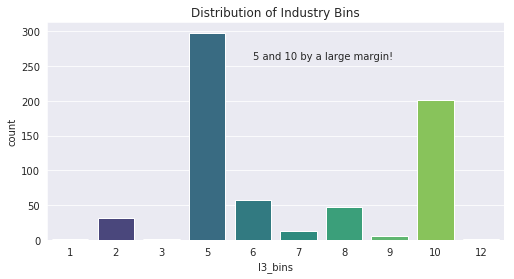

In [216]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,4))

# PLOT - distribution of industry bins
plt.subplot(1,2,1)
plt.text(4,260,"5 and 10 by a large margin!")
ax = sns.countplot(x="I3_bins", data=compdata_cat, palette="viridis")
ax.set(title="Distribution of Industry Bins")

plt.show()

## New Bins:

| Range of SIC Codes | Division | 
| ------------ | ---------- | 
| 0100-1999 | Other |
| 2000-3999 | Manufacturing |
| 4000-6799 | Other |
| 7000-8999 | Services |
| 9100-9999 | Other |

In [217]:
def assign_I3_bins_new(I3):
    if I3 >= 100 and I3 <= 1999:                          
        return(1)
    if I3 >= 2000 and I3 <= 3999:                  
        return(2)
    if I3 >= 4000 and I3 <= 6799:                  
        return(1)
    if I3 >= 7000 and I3 <= 8999:                  
        return(3)
    if I3 >= 9000 and I3 <= 9999:                  
        return(1)   
    
    # Creating a new column I3_bins in the dataframe

compdata_cat['I3_bins_new'] = compdata['I3'].apply(assign_I3_bins_new)  

compdata_cat.head()

,C3_,Imputed_C2,I3_bins,I3_bins_new
0,1,1.0,5,2
1,0,0.0,5,2
2,0,1.0,5,2
3,0,1.0,5,2
4,1,1.0,6,1


In [218]:
compdata_cat = compdata_cat.drop('I3_bins', axis=1)
compdata_cat.head()

,C3_,Imputed_C2,I3_bins_new
0,1,1.0,2
1,0,0.0,2
2,0,1.0,2
3,0,1.0,2
4,1,1.0,1


## Correlation

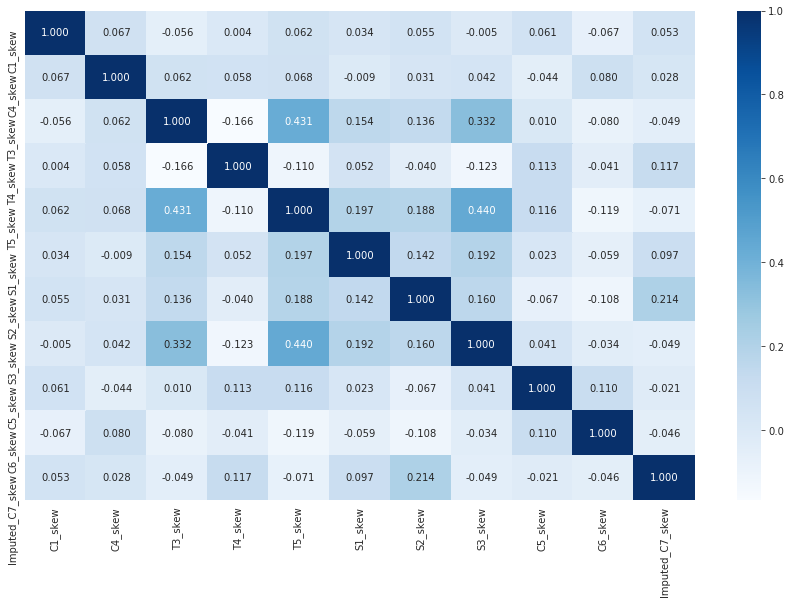

In [220]:
#Create Correlation df
compdata_cont_corr = compdata_cont_transform.drop(['C1','C4','T3_','T4_','T5_','S1_','S2_','S3_','C5_','C6_','Imputed_C7'], axis=1)
corr = compdata_cont_corr.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.show()

In [221]:
# compdata_cont_corr = compdata_cont_corr.join(['compdata_cat','targetvals'])
pipeline3_2 = pd.concat([compdata_cont_corr,compdata_cat,targetvals], axis=1)
pipeline3_2.head()

,C1_skew,C4_skew,T3_skew,T4_skew,T5_skew,S1_skew,S2_skew,S3_skew,C5_skew,C6_skew,Imputed_C7_skew,C3_,Imputed_C2,I3_bins_new,Y1,Y2
0,0.036209,1.381842,1.269795,2.441195,0.331826,0.210101,0.194749,0.166425,0.024701,0.964984,0.040048,1,1.0,2,0,1
1,0.054104,0.952123,1.246190,2.474773,0.295708,0.123495,0.222908,0.165314,0.042045,-0.000000,0.028733,0,0.0,2,1,0
2,0.028768,1.290826,1.270902,2.413433,0.420961,0.400509,0.136075,0.176086,0.022342,-0.000000,0.015384,0,1.0,2,1,0
3,0.049480,1.283436,1.289015,1.744974,0.419443,0.363526,0.155959,0.210509,0.021990,-0.000000,0.016541,0,1.0,2,1,1
4,0.026054,0.763495,1.222613,2.055109,0.258335,0.193175,0.208076,0.173254,0.024069,0.959650,0.113832,1,1.0,1,0,1


In [222]:
pipeline3_2.to_csv('../project1-deadlinedemons/pipeline3_2.csv', index=0)

In [ ]:
# check for infinite numbers in df

# log all the values for the continues values *positives
# exponential for the negative continues values

# make it fit better into range after log and exponential (sqrt? log again?)

In [101]:
# look for the ones over .5 or under -.5.. these are highly correlated ones
# flagging step

#every pair highly correlated need to be seperated into a different df

# make different dfs
    # 1 pair = 2
    # 2 pair = 4
    
# explain why theyre seperated

## do feature selection

# correlation is alwasy between -1 and 1

# merge all 3 parts together categorical back into .. categorical, contin (all the continues made.. not 1), target

# report all we did to change the data, not the data describing that we used to impute and change
# keep count of missing